# Examen Módulo 2

**Mantenga la calma y lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen2_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen2_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor absténgase de preguntar.

# ANTES DE EMPEZAR

Escribe tu número de expediente como semilla

In [1]:
import numpy as np
np.random.seed(727516)

empresas = ["Spotify", "Mercado Libre", "Microsoft", "Walmart", "Google", "Tesla", "Netflix", "Amazon", "Oracle", "Intel"]

print("Simulación Monte Carlo - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 1 - Problema " + str(np.random.choice([1, 2])))
print("Integración Monte Carlo Tipo 2 - Función " + str(np.random.choice([1, 2])))
print("Fractales - Fractal " + str(np.random.choice([1, 2])))
print("Probabilidad Precio-Umbral - Empresas: (" + str(np.random.choice(empresas, 2, replace=False)) + ")")

Simulación Monte Carlo - Problema 2
Integración Monte Carlo Tipo 1 - Problema 2
Integración Monte Carlo Tipo 2 - Función 1
Fractales - Fractal 1
Probabilidad Precio-Umbral - Empresas: (['Walmart' 'Netflix'])


---
### Simulación Monte Carlo - Problema 1

Un proyecto de construcción en una casa está por comenzar. Se hace la compra de los materiales y el proveedor dice que en promedio tardan una semana con 2 días de desviación estándar en llegar. Una vez llegados los materiales se tarda entre 2 y 3 semanas en construir (uniforme). Después de la construcción debes esperar 3 días antes de empezar a pintar, y te toma 4 días en promedio con medio día de desviación estándar hacerlo.

1. Define una función que te regrese el tiempo total de inicio a fin de proyecto dados los tiempos que toma cada paso.

2. Escribe en una celda de Markdown qué distribución usarías para cada paso del proceso.

3. Simula cada paso en el proceso un millón de veces.

4. Agrupa las simulaciones de cada paso para tener la simulación del proceso completo.

5. ¿Cuál es el tiempo promedio para el inicio-fin del proyecto?

6. Dadas tus simulaciones, ¿cuál fue el tiempo mínimo? ¿El máximo?

7. Grafica un histograma con tus resultados.

### Simulación Monte Carlo - Problema 2

Hay un elevador pequeño en una plaza donde se espera que entren máximo 4 personas a la vez, y su capacidad de peso para poder operar es de 320 kg.

Datos estadísticos de las personas que viven en esa zona mencionan que hay un 49% de mujeres, un 43% de hombres, y un 7% de personas que o prefirieron no contestar la pregunta o se identificaron como no binarias. El peso promedio medido en mujeres es de 68.7 kg con una desviación estándar de 7 kg. En los hombres se midió un peso promedio de 74.8 kg y una desviación estándar de 9 kg. En el tercer grupo se midió un peso promedio de 72 kg con una desviación estándar de 8 kg.

1. Escribe una función que retorne un peso dentro de los estadísticos dados. 

2. Si el elevador se llenara 10,000 veces, ¿cuántas de esas veces se excedería el peso permitido?

---
### Integración Monte Carlo tipo 1 - Problema 1

Encuentre los valores de $y(0.3)$, $y(0.5)$, $y(0.7)$, $y(0.9)$ y $y(1.1)$, conociendo $y(0.1)=0.1$ y su derivada
$$
\frac{dy}{dx}=\frac{\ln(2+\sin(2x^2))}{2xe^{-x^2}},\quad y(0.1)=0.1
$$

Para cada intervalo: $(0.1\leq x\leq0.3)$, $(0.3\leq x\leq0.5)$, $(0.5\leq x\leq0.7)$, $(0.7\leq x\leq0.9)$ y $(0.9\leq x\leq1.1)$ use integración Montecarlo de tipo 1 con $10^6$ puntos.

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [53]:
def montecarlo (f,n,a,b):
  u=np.random.uniform(a,b,n)
  media=np.mean(f(u))
  return media*(b-a)


2. Defina la función a integrar con argumentos de entrada $x$ y que regrese el valor de la derivada $\frac{dy}{dx}$.

In [ ]:
for i in n :
  aproximacion = montecarlo(f,int(i),0,1)
  table.loc[i,"aproximacion"]=aproximacion
  table.loc[i,"error"]=abs(6.73789 - aproximacion)

3. Encuentre la aproximación de las integrales con el método de Montecarlo de tipo 1. Escriba sus resultados en un _DataFrame_ de _pandas_.

4. Use el teorema fundamental del cálculo (visto en cálculo integral) para escribir la secuencia de valores para la solución $y(x)$, esto es $[y(0.1), y(0.3), y(0.5), y(0.7), y(0.9), y(1.1)]$.

Note que $y(0.3)=y(0.1)+\int_{0.1}^{0.3}\frac{dy}{dx}dx$, $y(0.5)=y(0.3)+\int_{0.3}^{0.5}\frac{dy}{dx}dx$, etc.

### Integración Monte Carlo tipo 1 - Problema 2

Dadas las funciones

$$ f_1(x) = \sin{(x)}e^{-\frac{x}{10}} + 1$$

$$ f_2(x) = 0.15x $$

$$ x \in [0, 4\pi]$$

1. Escriba la función de integración Montecarlo de tipo 1, con argumentos de entrada $f$, $a$, $b$ y $N$. Donde $f$ es la función a integrar, $a$ y $b$ son los límites de integración y $N$ es el número de puntos utilizados para la integración. Y que regrese el valor de la integral.

In [52]:
def montecarlo (f,n,a,b):
  u=np.random.uniform(a,b,n)
  media=np.mean(f(u))
  return media*(b-a)


2. Defina las funciones dadas como funciones de Python, con argumento de entrada $x$.

In [60]:
f1=np.sin(x)*np.exp(x/10)+1
f2=0.15*x

In [61]:
import numpy as np
import random
import matplotlib.pyplot as plt


def f(x):
  return np.sin(x)*np.exp(x/10)+1
a=2
b=2.1
n=100
np.random.seed(14)
u1=np.random.uniform(a,b,n)

np.mean(f(u))


1.4571347335751779

3. Grafique las funciones en una sola figura. Utiliza el comando `plt.fill_between` para rellenar el área a integrar.

In [57]:
plt.figure()
plt.plot([1,2,3,4,5],table["error"])
plt.fill_between

KeyError: 'error'

<Figure size 640x480 with 0 Axes>

4. ¿Cuál es el área del espacio que se llenó después de `plt.fill_between`? Aproxima tu resultado con 1'000,000 puntos.

5. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales ($f_1(x)$, $f_2(x)$, área total)** y el **error** para $N=10^4,\, 10^5,\, 10^6$.

---
### Integración Monte Carlo tipo 2 
Dada una superfice en el espacio $f(x,y)$, una curva de nivel, es el corte transversal donde se cumple $f(x,y)=v$, con $v$ tal que pertenece al dominio de $f$. 



**Función 1:** Encuentre el área de todas las curvas de nivel que cumplan $f(x,y)>v$, donde 
$$
f(x,y)=-xy\,e^{-x^2-y^2},
$$
y $v=0.05$

**Función 2:** Encuentre el área que cumpla $f(x,y)>v$, donde 
$$
f(x,y)=e^{-0.05(x^2+y^2)}\sin(x^2+y^2),
$$
y $v=0.5$.

1. Escriba la función que discrimine los puntos que satisfacen la restricción $f(x,y)>v$, con argumentos de entrada $x$ y $y$ y que regrese Verdadero o Falso.

In [31]:
def fun_act(x,y):
    return   -x*y*np.exp(-x**2-y**2)
def montecarlo2 (region,xa,xb,ya,yb,N):
    x=np.random.uniform(xa,xb,N)
    y=np.random.uniform(ya,yb,N)
    b=region(x,y)
    AR=(xb-xa)*(yb-ya)
    return np.mean(b)*AR
montecarlo2(fun_act,0,1,0,1,500)

-0.09839653078614237

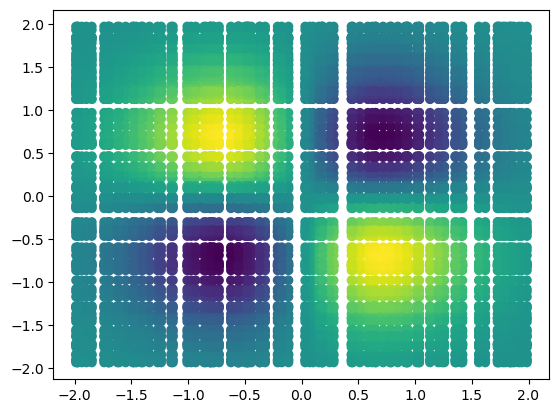

In [38]:
x=np.random.uniform(-2,2,100)
y=np.random.uniform(-2
                    ,2
                    ,100)

X,Y= np.meshgrid(x,y)
plt.figure()
plt.scatter(X,Y,c=fun_act(X,Y))

2. Encuentre los límites de integración para $x$ y para $y$ que encierren el área deseada y grafique.

los limites son de un cubo de 2 a 2


3. Escriba la función para integrar con el método de Montecaralo de tipo 2 con argumentos de entrada $f$, $xmin$, $xmax$, $ymin$, $ymax$, y $N$. Donde $f$ es una función que define la región de integración; $xmin$, $xmax$, $ymin$ y $ymax$ definen los límites de integración y $N$ el número de puntos en $x$ y $y$ para usar en el método. Esta función debe regresar el valor de la integral.

In [39]:
import pandas as pd
n=np.logspace(1,5,5)
n
table = pd.DataFrame(columns=["aproximacion"],index=n)
for i in n :
    aproximacion = montecarlo2(fun_act,0,1,0,1,int(i))
    table.loc[i,"aproximacion"]=aproximacion
  
table

,aproximacion
10.0,-0.106607
100.0,-0.100272
1000.0,-0.101273
10000.0,-0.100435
100000.0,-0.100065


4. En un _DataFrame_ de _pandas_ escriba el valor de **las integrales** y la **estimación del error relativo** para $N=10^4,\, 10^5,\, 10^6$.

In [51]:
for i in n :
  aproximacion = montecarlo(f,int(i),0,1)
  table.loc[i,"aproximacion"]=aproximacion
  table.loc[i,"error"]=abs(0.0432857-aproximacion)

NameError: name 'f' is not defined

In [41]:
def montecarlo (f,n,a,b):
  u=np.random.uniform(a,b,n)
  media=np.mean(f(u))
  return media*(b-a)


---
### Generación de fractales

Los fractales de tipo Barnsley se generan con transformaciones afines con cierta probabilidad.

Genere un cuadro perturbado tridimensional con la ecuación:
$$
\begin{bmatrix}x_{k+1}\\y_{k+1}\\z_{k+1}
\end{bmatrix}=A_i\begin{bmatrix}x_k\\y_k\\z_k\end{bmatrix}+b_i
$$
Y sus respectivas matrices:

**Fractal 1:**

In [43]:
import numpy as np

A0 = np.array([[0.5,0.1853,0],[0.1667,0.3639,-0.0962],[0,0.1555,0.5]])
b0 = np.array([-1.0462,-0.8914,1.2468]).reshape(-1, 1)

A1 = np.array([[0.5,0.042,0],[-0.1667,0.3639,-0.0962],[0,-0.2382,0.5]])
b1 = np.array([1.6029,-0.8914,0.2826]).reshape(-1, 1)

A2 = np.array([[0.5,-0.2273,0],[0,-0.3639,0.1925],[0,0.0827,0.5]])
b2 = np.array([-0.5567,-0.8914,-1.5294]).reshape(-1, 1)

A3 = np.array([[0.383,0,0.3214],[0,0.5,0],[-0.3214,0,0.383]])
b3 = np.array([0,1.2247,0]).reshape(-1, 1)

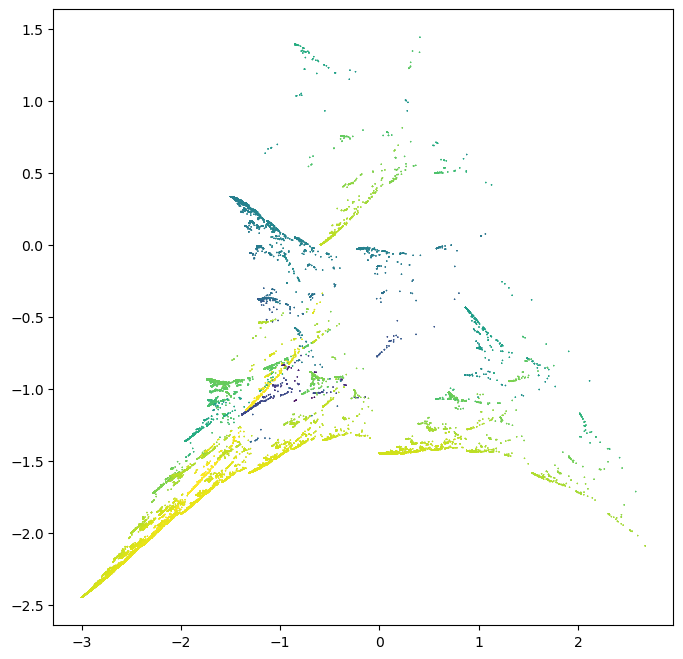

In [50]:

import numpy as np
import matplotlib.pyplot as plt

A = [A0, A1, A2, A3]
b = [b0, b1, b2, b3]

x, y, z = 0, 0, 0

num_iterations = 100000

x_v, y_v, z_v = [], [], []

probabilities = [0.85, 0.07, 0.07, 0.01]

for _ in range(num_iterations):
 
    tran = np.random.choice([0, 1, 2, 3], p=probabilities)
    

    new_x, new_y, new_z = np.dot(A[tran], np.array([x, y, z])) + b[tran]
    
    
    x, y, z = new_x, new_y, new_z
    
    
    x_v.append(x)
    y_v.append(y)
    z_v.append(z)


plt.figure(figsize=(8, 8))
plt.scatter(x_v, y_v, s=1, c=z_v, cmap='viridis', edgecolor='none')
plt.show()


**Fractal 2:**

In [ ]:
import numpy as np

A0 = np.array([[0,0,0],[0,0.18,0],[0,0,0]])
b0 = np.array([0,0,0])

A1 = np.array([[0.85,0,0],[0,0.85,0.1],[0,-0.1,0.85]])
b1 = np.array([0,1.6,0])

A2 = np.array([[0.2,-0.2,0],[0.2,0.2,0],[0,0,0.3]])
b2 = np.array([0,0.8,0])

A3 = np.array([[-0.2,0.2,0],[0.2,0.2,0],[0,0,0.3]])
b3 = np.array([0,0.8,0])

cuya probabilidad es la misma para cada $i=\{0,1,2,3\}$. Use la función scatter de una proyección 3D sobre los ejes:
```
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(x,y,z)
```

---
### Probabilidad Precio-Umbral
Se tiene la siguiente lista de empresas:
- Spotify
- Mercado Libre
- Microsoft
- Walmart
- Google
- Tesla
- Netflix
- Amazon
- Oracle
- Intel

Suponga que desea invertir en dos de ellas. Evalúe la probabilidad de obtener un retorno del 10% en tres meses a partir del 30 de septiembre del presente año.

1. Describa una función para obtener los precios de cierre ajustados para dividendos y divisiones desde *YAHOO finance*, usando el paquete de *yfinance*, donde los argumentos de entrada sean los nombres de las empresas, la fecha de inicio, y la fecha de fin a los cuales se obtendrán los datos.

In [4]:
import yfinance as yf

In [5]:
def getClose(name, start, end) :
    return yf.download(name,start,end)["Adj Close"]

2. Obtenga los precios de cierre ajustados desde el 30 de septiembre de 2021 al 29 de septiembre de 2023.

In [6]:
data = getClose(["NFLX", "WMT"], "2015-01-01", "2019-12-31")
data

[*********************100%%**********************]  2 of 2 completed


,NFLX,WMT
Date,,
2015-01-02,49.848572,71.431725
2015-01-05,47.311428,71.223824
2015-01-06,46.501431,71.772652
2015-01-07,46.742859,73.676964
2015-01-08,47.779999,75.231995
...,...,...
2019-12-23,333.100006,112.169952
2019-12-24,333.200012,112.622284
2019-12-26,332.630005,112.631721


3. Calcule el rendimiento **simple** para ambas empresas.

<Axes: ylabel='Frequency'>

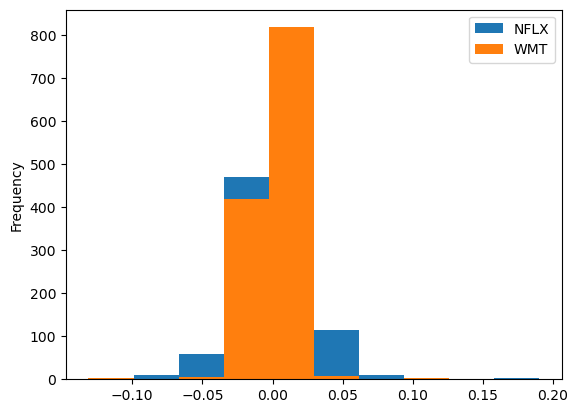

In [9]:

R = (data - data.shift())/data.shift()
R.plot.hist()

4. Escriba una función que, dando como argumentos:
* un vector de valores
* la fecha de inicio,
* **la fecha del fin de simulación** (**NO el número de días**) y
* número de escenarios a simular;

calcula la media, la desviación estándar, y regrese en un _DataFrame_ de _pandas_ datos simulados de una distribución normal caracterizada cuyo índice sea el rango de fechas dadas como argumentos.

In [28]:
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_R(0.000438, 0.012342,"2023-10-16",92,100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-10-16,0.015230,-0.004011,-0.004740,0.007087,0.005544,-0.000215,-0.010976,0.000152,-0.008102,-0.002522,...,0.003150,0.001904,0.013003,-0.005394,0.018635,-0.006114,-0.025610,-0.017447,-0.000883,-0.005524
2023-10-17,0.012461,0.000183,0.015057,0.002310,-0.003604,0.000213,0.002507,0.012852,0.010075,-0.017706,...,-0.010052,0.010893,-0.002762,-0.014821,0.013190,-0.027062,0.010218,-0.009534,0.000141,-0.014019
2023-10-18,-0.000154,0.023091,0.031877,0.013870,-0.002036,0.002643,-0.017213,0.007195,0.008352,-0.003580,...,0.016750,-0.020021,-0.019128,-0.005731,-0.038780,0.001833,-0.003372,0.008360,-0.027930,-0.003231
2023-10-19,-0.016874,-0.018856,-0.002538,-0.001402,-0.003324,0.000318,0.011511,-0.015401,-0.022790,0.000811,...,0.011391,0.024678,-0.009673,0.015764,0.005247,0.002247,-0.005062,0.028665,0.001892,-0.014857
2023-10-20,0.010163,0.007882,-0.012675,-0.011926,0.007766,0.006059,0.009250,-0.008658,0.000191,0.002697,...,-0.002394,-0.011860,0.008812,0.014108,-0.005974,-0.004313,-0.007308,0.005772,0.003846,0.008470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-11,-0.009659,-0.002508,-0.000071,-0.001298,-0.000274,0.010486,-0.002925,0.013142,0.012668,-0.004262,...,0.002799,-0.010680,-0.000168,0.011312,0.013208,-0.006548,0.004645,0.004419,0.014007,-0.010078
2024-01-12,0.008397,0.004323,0.018169,-0.006088,-0.003670,0.002518,0.001550,0.000915,0.007162,-0.002309,...,-0.017110,-0.027655,-0.002300,-0.014919,-0.002003,0.006992,0.005619,0.016729,0.019013,0.002317
2024-01-13,-0.012275,0.002354,-0.007044,-0.005756,0.004211,0.001716,-0.009647,0.000554,-0.012532,0.021913,...,0.007509,0.014582,-0.014460,-0.015014,0.008566,-0.001604,-0.010345,0.017772,0.013346,-0.022143
2024-01-14,0.007461,0.008488,0.006208,0.022523,0.015033,-0.000335,0.000427,-0.008109,-0.014898,-0.008551,...,0.001501,0.011963,-0.013595,0.016252,0.025108,0.004052,0.018356,-0.004948,0.009210,-0.022577


In [27]:
def sim_R(media,std,fecha_inicio,dias,N):
    R_sim =  np.random.normal(media,std,size=(dias,N))
    fechas=pd.date_range(start=fecha_inicio,periods=dias)
    return pd.DataFrame(index=fechas,data=R_sim)
sim_R(0.001830, 0.026263,"2023-10-16",92,100000)

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
2023-10-16,0.005187,0.025549,-0.022816,-0.057741,0.004652,-0.010158,-0.017326,-0.066292,0.028806,-0.032494,...,0.026383,-0.009167,-0.034345,-0.000612,0.006954,-0.013784,-0.009497,-0.009366,0.015947,0.032218
2023-10-17,-0.013105,-0.006180,-0.018324,0.020594,0.014266,-0.020509,0.035760,0.004783,0.050198,0.024740,...,0.000822,-0.014873,-0.003568,-0.031926,0.051768,0.011488,0.023567,-0.010766,-0.035246,-0.027368
2023-10-18,0.020915,-0.027915,0.011283,-0.015524,-0.002337,-0.032806,0.012465,0.038191,-0.002614,0.050568,...,-0.017586,0.069528,0.037080,0.010422,0.050800,-0.002603,-0.024170,0.046503,0.038832,-0.021468
2023-10-19,-0.049381,-0.005196,0.012882,0.038658,0.016363,-0.002305,0.012759,0.005714,-0.030069,-0.010845,...,0.013889,-0.020551,-0.004729,0.004085,0.004462,0.000907,-0.048458,-0.028866,0.010988,0.006212
2023-10-20,-0.005698,-0.009541,-0.034061,0.004802,-0.000193,0.014409,0.010157,0.026699,0.037608,-0.031247,...,0.041180,-0.042421,-0.007147,0.015745,0.039758,0.006719,-0.003693,-0.004637,0.034190,-0.015363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-11,-0.023387,-0.007914,-0.004955,-0.009658,-0.016902,0.008858,0.011417,-0.046736,0.028648,0.009061,...,-0.051732,-0.019841,-0.017811,0.051096,-0.017088,-0.035457,-0.012090,0.046972,-0.007197,-0.006146
2024-01-12,-0.017533,-0.016221,0.022898,0.027943,0.030686,-0.020772,-0.012692,0.003286,0.083516,-0.012051,...,-0.004128,0.024894,0.013571,0.010742,0.020223,0.009388,-0.014206,0.009646,0.004680,0.001162
2024-01-13,0.044616,0.001109,0.000161,0.013397,-0.014018,0.008427,-0.001510,-0.077047,-0.005103,0.050645,...,0.033399,0.033674,-0.028091,-0.013643,0.039034,0.029001,0.008932,0.002414,0.017305,-0.011500
2024-01-14,0.046330,-0.006328,-0.002644,-0.001153,-0.002465,0.043176,-0.022728,-0.008635,-0.038443,-0.005039,...,-0.023065,-0.033711,0.011966,-0.008517,-0.005986,0.013873,0.035285,0.026914,-0.025018,-0.020897


5. Calcule la media y desviación estandar de los rendimientos y simule 100000 escenarios de rendimientos desde el 31 de marzo de 2023 al 31 de julio de 2023.

In [17]:
R.mean()


NFLX    0.001830
WMT     0.000438
dtype: float64

In [18]:
R.std()

NFLX    0.026263
WMT     0.012342
dtype: float64

In [21]:
sim = sim_R(R.mean(), R.std(), "2023-10-16", 50, 10000)
sim

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50, 10000) and arg 1 with shape (2,).

6. Use los datos de simulación para obtener los precios proyectados al cierre para ambas empresas en estos meses.

7. En un gráfico muestre la evolución de ambas probabilidades de obtener un retorno del 10%. ¿Cuál genera mayores expectativas?